<a href="https://colab.research.google.com/github/lucasresck/FGV-EMAp/blob/master/Modeling%20Biological%20Phenomena/A1%20assignment/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simulação computacional de processos evolutivos e seleção natural

Foi implementado um ambiente com comida limitada e vários indivíduos de certa espécie, que devem competir entre si.
A cada dia, a comida é distribuída, uma a uma, a cada indivíduo.
Cada indivíduo tem um grau de adaptação (*fitness*), que é indicativo da probabilidade de receber a comida. Se receber uma comida, ele sobrevive para o dia seguinte; se receber duas comidas, ele sobrevive para o dia seguinte e se reproduz, saindo automaticamente do sorteio das próximas comidas no mesmo dia.
Cada indivíduo também tem energia, que indica em quantas rodadas de distribuição no mesmo dia um indivíduo pode participar. Se o indivíduo fica sem energia durante a distribuição neste dia, ele automaticamente morre.
O grau de adaptação dos indivíduos, neste caso, é sua característica de velocidade. Ou seja, quanto mais veloz, mais adaptado. Porém, a velocidade tem custo na energia, sendo que a cada rodada de distribuição é descontada da energia do indivíduo o quadrado da velocidade.
Quando um indivíduo se reproduz, existe uma probabilidade pequena de que haja uma mutação na característica de velocidade do seu descendente.
O objetivo, portanto, dessa implementação, é verificar como os indivíduos se comportam em um ambiente com comida escassa e como encontram a velocidade que maximiza a probabilidade de sobreviverem (ou seja, maximiza junto energia e grau de adaptação).

In [0]:
import random
import time
import matplotlib.pyplot as plt
import statistics
import numpy as np

random.seed(time.time())

class Environment:
    def __init__(self, n, speed, energy, mutation):
        self.n = n
        self.speed = speed
        self.energy = energy
        self.mutation = mutation
        self.getIndividuals()
        self.dataMean = []
        self.dataStdev = []
        self.dataN = []
        self.born = n
        self.died = 0

    def getIndividuals(self):  # Create individuals
        self.individuals = [Individual(speed = self.speed, energy = self.energy) for i in range(self.n)]

    def run(self, days, nFood):
        self.record()
        self.days = days
        self.nFood = nFood

        for day in range(days):
            individualsThisDay = self.individuals.copy()
            for epoch in range(self.nFood):
                for individual in individualsThisDay.copy():
                    if individual.energy < (individual.speed)**2 or individual.food == 2:
                        individualsThisDay.remove(individual)
                    else:
                        individual.energy -= (individual.speed)**2
                self.sortFood(individualsThisDay)
            for individual in self.individuals.copy():
                if individual.food == 0:
                    self.individuals.remove(individual)
                    self.died +=1
                    continue
                elif individual.food == 2:
                    self.reprodution(individual)
                    self.born += 1
                individual.energy = self.energy
                individual.food = 0

            self.record()
            
    def sortFood(self, individualsThisDay):
        sumFitness = 0
        for individual in individualsThisDay:
            sumFitness += individual.fitness
        lucky = random.random()*sumFitness
        for i, individual in enumerate(individualsThisDay):
            if lucky < individual.fitness:
                individual.food += 1
                break
            else:
                lucky -= individual.fitness

    def reprodution(self, individual):
        dice = random.random()
        newSpeed = individual.speed
        if dice < self.mutation:
            newSpeed += random.random()*2 - 1
        self.individuals.append(Individual(speed = newSpeed, energy = self.energy))

    def record(self):
        self.dataMean.append(sum([individual.fitness for individual in self.individuals])/len(self.individuals))
        self.dataStdev.append(statistics.pstdev([individual.fitness for individual in self.individuals]))
        self.dataN.append(len(self.individuals))

    def plot(self):
        print("During " + str(self.days) + " days:")
        print()
        print(str(self.born) + " individuals were born")
        print(str(self.died) + " individuals died")
        print("Mean of fitness: " + str(self.dataMean[-1]))

        t = np.arange(0, self.days + 1)
        
        fig, ax = plt.subplots(1, 1)
        ax.plot(t, self.dataMean)
        plt.title("Média dos graus de adaptação no tempo")
        ax.set_xlabel("Tempo (dias)")
        ax.set_ylabel("Média dos graus de adaptação")
        plt.show()

        fig, ax = plt.subplots(1, 1)
        ax.plot(t, self.dataStdev)
        plt.title("Desvio-padrão dos graus de adaptação no tempo")
        ax.set_xlabel("Tempo (dias)")
        ax.set_ylabel("Desvio-padrão dos graus de adaptação")
        plt.show()

        fig, ax = plt.subplots(1, 1)
        plt.title("Número de indivíduos no tempo")
        ax.set_xlabel("Tempo (dias)")
        ax.set_ylabel("Número de indivíduos")
        ax.plot(t, self.dataN)
        plt.show()

class Individual:
    def __init__(self, speed, energy):
        self.speed = speed
        self.energy = energy
        self.fitness = speed  # Fitness is the degree of adaptation
        self.food = 0

During 1000 days:

14113 individuals were born
14063 individuals died
Mean of fitness: 1.241444559910817


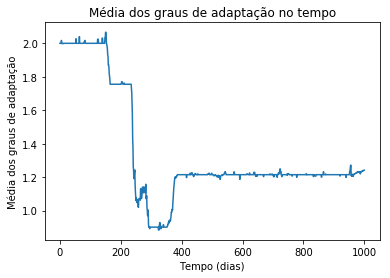

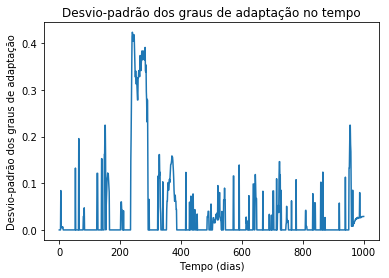

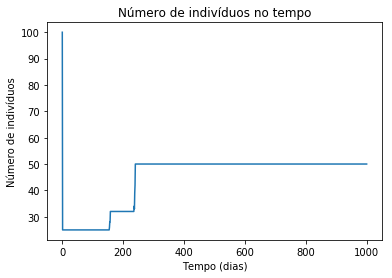

In [88]:
env = Environment(n = 100, speed = 2, energy = 100, mutation = 0.005)
env.run(days = 1000, nFood = 50)
env.plot()

During 1000 days:

15832 individuals were born
15782 individuals died
Mean of fitness: 1.3784212848752717


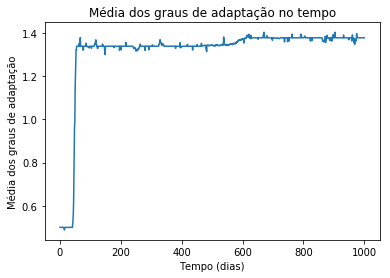

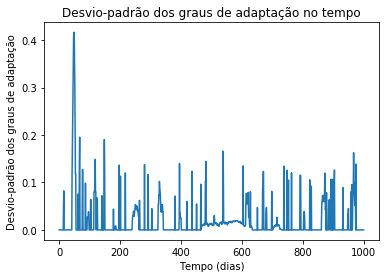

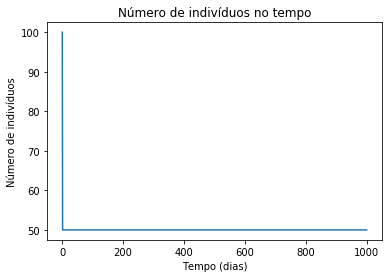

In [89]:
env2 = Environment(n = 100, speed = 0.5, energy = 100, mutation = 0.005)
env2.run(days = 1000, nFood = 50)
env2.plot()

Observamos que, em ambos os casos em que os indivíduos são iniciados com velocidade alta e velocidade baixa, existe uma convergência da velocidade média dos indivíduos para algo em torno de 1,2. Além disso, o número de indivíduos sempre se iguala a 100.
No caso do número de indivíduos, isso é de certa forma óbvio: não há comida para todos, há apenas para 100 indíviduos, no máximo. E, caso algum indíviduo receba duas comidas, ele se reproduz, então a quantidade de indíviduos se mantém em 100.
Aparentemente a velocidade média (que procura sempre aumentar, pois aumenta o grau de adaptação) sobe até que comece a haver prejuízo para o indivíduo, ou seja, ele não tenha energia para todas as rodadas. Observe que 1,2, mais ou menos, é o valor ideal de velocidade que não prejudica a energia, pois 150/(1.2²) indica quantas rodadas o indivíduo participa, algo que fica próximo de 100.

Podemos melhorar nosso modelo, adicionando mais características (peso e tamanho) e permitindo que os indivíduos morram por idade.

In [0]:
class Environment2:
    def __init__(self, n, speed, size, weight, energy, mutation, age):
        self.n = n
        self.speed = speed
        self.energy = energy
        self.mutation = mutation
        self.size = size
        self.weight = weight
        self.age = age
        self.getIndividuals()
        self.dataMean = []
        self.dataStdev = []
        self.dataMeanSpeed = []
        self.dataStdevSpeed = []
        self.dataMeanSize = []
        self.dataStdevSize = []
        self.dataMeanWeight = []
        self.dataStdevWeight = []
        self.dataN = []
        self.born = n
        self.died = 0
        self.diedAge = 0

    def getIndividuals(self):  # Create individuals
        self.individuals = [Individual2(speed = self.speed, size = self.size,
                                        weight = self.weight,
                                        energy = self.energy) for i in range(self.n)]

    def run(self, days, nFood):
        self.record()
        self.days = days
        self.nFood = nFood

        for day in range(days):
            individualsThisDay = self.individuals.copy()
            for epoch in range(self.nFood):  #Who entered here is guaranteed that has energy and is not full of food
                for individual in individualsThisDay.copy():
                    if (individual.energy < individual.speed**2 + individual.size**3 + individual.weight
                    or individual.food == 2):
                        individualsThisDay.remove(individual)
                    else:
                        individual.energy -= individual.speed**2 + individual.size**3 + individual.weight
                self.sortFood(individualsThisDay)

            for individual in self.individuals.copy():
                if individual.food == 0:
                    self.individuals.remove(individual)
                    self.died += 1
                    continue
                elif individual.food == 2:
                    self.reprodution(individual)
                    self.born += 1
                individual.food = 0
                individual.energy = self.energy
                individual.age += 1
                if individual.age >= self.age:
                    self.individuals.remove(individual)
                    self.died += 1
                    self.diedAge += 1

            self.record()
            
    def sortFood(self, individualsThisDay):
        sumFitness = 0
        for individual in individualsThisDay:
            sumFitness += individual.fitness
        lucky = random.random()*sumFitness
        for i, individual in enumerate(individualsThisDay):
            if lucky < individual.fitness:
                individual.food += 1
                break
            else:
                lucky -= individual.fitness

    def reprodution(self, individual):
        dice = random.random()
        newSpeed = individual.speed
        if dice < self.mutation:
            newSpeed += random.random()*2 - 1

        dice = random.random()
        newSize = individual.size
        if dice < self.mutation:
            newSize += random.random()*2 - 1

        dice = random.random()
        newWeight = individual.weight
        if dice < self.mutation:
            newWeight += random.random()*2 - 1

        self.individuals.append(Individual2(speed = newSpeed, size = newSize,
                                            weight = newWeight, energy = self.energy))

    def record(self):
        self.dataMean.append(sum([individual.fitness for individual in self.individuals])/len(self.individuals))
        self.dataStdev.append(statistics.pstdev([individual.fitness for individual in self.individuals]))
        self.dataMeanSpeed.append(sum([individual.speed for individual in self.individuals])/len(self.individuals))
        self.dataStdevSpeed.append(statistics.pstdev([individual.speed for individual in self.individuals]))
        self.dataMeanSize.append(sum([individual.size for individual in self.individuals])/len(self.individuals))
        self.dataStdevSize.append(statistics.pstdev([individual.size for individual in self.individuals]))
        self.dataMeanWeight.append(sum([individual.weight for individual in self.individuals])/len(self.individuals))
        self.dataStdevWeight.append(statistics.pstdev([individual.weight for individual in self.individuals]))
        self.dataN.append(len(self.individuals))

    def plot(self):
        print("During " + str(self.days) + " days:")
        print()
        print(str(self.born) + " individuals were born")
        print(str(self.died) + " individuals died, " + str(self.diedAge) + " of them by age")
        print("Mean of fitness: " + str(self.dataMean[-1]))
        print("Mean of speed: " + str(self.dataMeanSpeed[-1]))
        print("Mean of size: " + str(self.dataMeanSize[-1]))
        print("Mean of weight: " + str(self.dataMeanWeight[-1]))

        t = np.arange(0, self.days + 1)

        fig, ax = plt.subplots(1, 1)
        ax.plot(t, self.dataMean, label = "grau de adaptação")
        ax.plot(t, self.dataMeanSpeed, label = "velocidade")
        ax.plot(t, self.dataMeanSize, label = "tamanho")
        ax.plot(t, self.dataMeanWeight, label = "peso")
        plt.title("Média das características no tempo")
        ax.set_xlabel("Tempo (dias)")
        ax.set_ylabel("Média das características")
        ax.legend()
        plt.show()

        fig, ax = plt.subplots(1, 1)
        ax.plot(t, self.dataStdev, label = "grau de adaptação")
        ax.plot(t, self.dataStdevSpeed, label = "velocidade")
        ax.plot(t, self.dataStdevSize, label = "tamanho")
        ax.plot(t, self.dataStdevWeight, label = "peso")
        plt.title("Desvio-padrão das características no tempo")
        ax.set_ylabel("Desvio-padrão das características")
        ax.set_xlabel("Tempo (dias)")
        ax.legend()
        plt.show()
        
        fig, ax = plt.subplots(1, 1)
        plt.title("Número de indivíduos no tempo")
        ax.set_xlabel("Tempo (dias)")
        ax.set_ylabel("Número de indivíduos")
        ax.plot(t, self.dataN)
        plt.show()

class Individual2:
    def __init__(self, speed, size, weight, energy):
        self.speed = speed
        self.size = size
        self.weight = weight
        self.energy = energy
        self.fitness = speed + size + weight  # Fitness is the degree of adaptation
        self.food = 0
        self.age = 0

During 5000 days:

76044 individuals were born
75994 individuals died, 1840 of them by age
Mean of fitness: 2.21533942428205
Mean of speed: 1.1225969213298173
Mean of size: 0.45049812071479073
Mean of weight: 0.6422443822374424


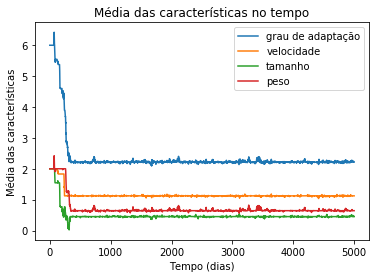

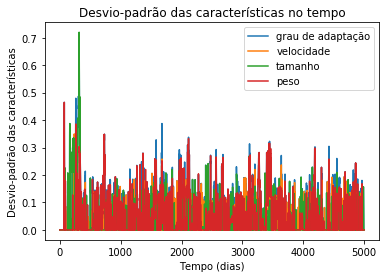

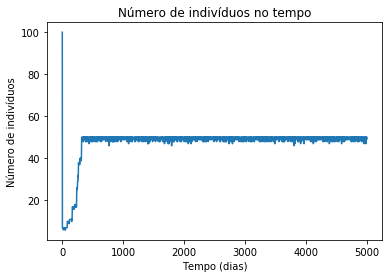

In [102]:
env3 = Environment2(n = 100, speed = 2, size = 2, weight = 2, energy = 100, mutation = 0.005, age = 10)
env3.run(days = 5000, nFood = 50)
env3.plot()

During 5000 days:

79149 individuals were born
79100 individuals died, 1883 of them by age
Mean of fitness: 2.347848922512366
Mean of speed: 0.705728765591367
Mean of size: 0.7181337687968211
Mean of weight: 0.9239863881241751


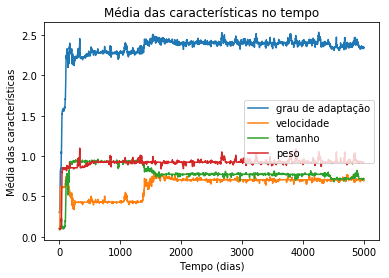

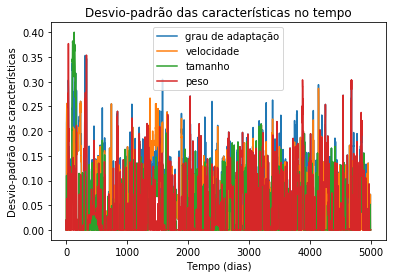

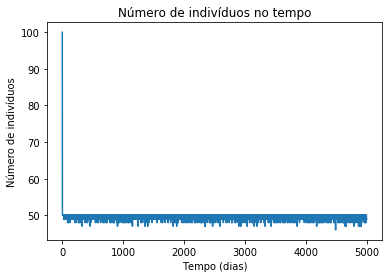

In [103]:
env4 = Environment2(n = 100, speed = 0.1, size = 0.1, weight = 0.1,
                    energy = 100, mutation = 0.005, age = 10)
env4.run(days = 5000, nFood = 50)
env4.plot()

Vamos adicionar reprodução sexuada ao modelo. Indivíduos agora têm sexo e se reproduzem entre si, ao invés se de replicarem. Os indíviduos que obtiverem duas comidas em um dia são aqueles com a capacidade de reprodução naquele dia. Entre os indivíduos capazes de se reproduzir, os mais bem adaptados de um sexo se reproduzem com os mais bem adaptados do outro. Como o número de indivíduos com capacidade de reprodução em um determinado dia é diferente entre os sexos, alguns indivíduos não conseguirão se reproduzir.

In [0]:
class Environment3:
    def __init__(self, n, speed, size, weight, energy, mutation, age):
        self.n = n
        self.speed = speed
        self.energy = energy
        self.mutation = mutation
        self.size = size
        self.weight = weight
        self.age = age
        self.getIndividuals()
        self.dataMean = []
        self.dataStdev = []
        self.dataMeanSpeed = []
        self.dataStdevSpeed = []
        self.dataMeanSize = []
        self.dataStdevSize = []
        self.dataMeanWeight = []
        self.dataStdevWeight = []
        self.dataN = []
        self.born = n
        self.died = 0
        self.diedAge = 0

    def getIndividuals(self):  # Create individuals
        self.individuals = [Individual3(speed = self.speed, size = self.size,
                                        weight = self.weight,
                                        energy = self.energy) for i in range(self.n)]

    def run(self, days, nFood):
        self.record()
        self.days = days
        self.nFood = nFood

        for day in range(days):
            individualsThisDay = self.individuals.copy()
            for epoch in range(self.nFood):  #Who entered here is guaranteed that has energy and is not full of food
                for individual in individualsThisDay.copy():
                    if (individual.energy < individual.speed**2 + individual.size**3 + individual.weight
                    or individual.food == 2):
                        individualsThisDay.remove(individual)
                    else:
                        individual.energy -= individual.speed**2 + individual.size**3 + individual.weight
                self.sortFood(individualsThisDay)

            toReproduce = []
            for individual in self.individuals.copy():
                if individual.food == 0:
                    #count += 1
                    self.individuals.remove(individual)
                    self.died += 1
                    continue
                elif individual.food == 2:
                    #self.reprodution(individual)
                    toReproduce.append(individual)
                individual.food = 0
                individual.energy = self.energy
                individual.age += 1
                if individual.age >= self.age:
                    self.individuals.remove(individual)
                    self.died += 1
                    self.diedAge += 1

            self.reproduce(toReproduce)
            self.record()
            
    def sortFood(self, individualsThisDay):
        sumFitness = 0
        for individual in individualsThisDay:
            sumFitness += individual.fitness
        lucky = random.random()*sumFitness
        for i, individual in enumerate(individualsThisDay):
            if lucky < individual.fitness:
                individual.food += 1
                break
            else:
                lucky -= individual.fitness

    def reproduce(self, toReproduce):
        females = [individual for individual in toReproduce if individual.sex == 1]
        females = sorted(females, key=lambda individual: individual.fitness, reverse=True)
        males = [individual for individual in toReproduce if individual.sex == 0]
        males = sorted(males, key=lambda individual: individual.fitness, reverse=True)

        n = min(len(females), len(males))

        for couple in range(n):

            newSpeed = (females[couple].speed + males[couple].speed)/2
            dice = random.random()
            if dice < self.mutation:
                newSpeed += random.random()*2 - 1

            newSize = (females[couple].size + males[couple].size)/2
            dice = random.random()
            if dice < self.mutation:
                newSize += random.random()*2 - 1

            newWeight = (females[couple].weight + males[couple].weight)/2
            dice = random.random()
            if dice < self.mutation:
                newWeight += random.random()*2 - 1

            self.individuals.append(Individual3(speed = newSpeed, size = newSize,
                                                weight = newWeight, energy = self.energy))
            self.born += 1

    def record(self):
        self.dataMean.append(sum([individual.fitness for individual in self.individuals])/len(self.individuals))
        self.dataStdev.append(statistics.pstdev([individual.fitness for individual in self.individuals]))
        self.dataMeanSpeed.append(sum([individual.speed for individual in self.individuals])/len(self.individuals))
        self.dataStdevSpeed.append(statistics.pstdev([individual.speed for individual in self.individuals]))
        self.dataMeanSize.append(sum([individual.size for individual in self.individuals])/len(self.individuals))
        self.dataStdevSize.append(statistics.pstdev([individual.size for individual in self.individuals]))
        self.dataMeanWeight.append(sum([individual.weight for individual in self.individuals])/len(self.individuals))
        self.dataStdevWeight.append(statistics.pstdev([individual.weight for individual in self.individuals]))
        self.dataN.append(len(self.individuals))

    def plot(self):
        print("During " + str(self.days) + " days:")
        print()
        print(str(self.born) + " individuals were born")
        print(str(self.died) + " individuals died, " + str(self.diedAge) + " of them by age")
        print("Mean of fitness: " + str(self.dataMean[-1]))
        print("Mean of speed: " + str(self.dataMeanSpeed[-1]))
        print("Mean of size: " + str(self.dataMeanSize[-1]))
        print("Mean of weight: " + str(self.dataMeanWeight[-1]))

        t = np.arange(0, self.days + 1)

        fig, ax = plt.subplots(1, 1)
        ax.plot(t, self.dataMean, label = "grau de adaptação")
        ax.plot(t, self.dataMeanSpeed, label = "velocidade")
        ax.plot(t, self.dataMeanSize, label = "tamanho")
        ax.plot(t, self.dataMeanWeight, label = "peso")
        plt.title("Média das características no tempo")
        ax.set_xlabel("Tempo (dias)")
        ax.set_ylabel("Média das características")
        ax.legend()
        plt.show()

        fig, ax = plt.subplots(1, 1)
        ax.plot(t, self.dataStdev, label = "grau de adaptação")
        ax.plot(t, self.dataStdevSpeed, label = "velocidade")
        ax.plot(t, self.dataStdevSize, label = "tamanho")
        ax.plot(t, self.dataStdevWeight, label = "peso")
        plt.title("Desvio-padrão das características no tempo")
        ax.set_ylabel("Desvio-padrão das características")
        ax.set_xlabel("Tempo (dias)")
        ax.legend()
        plt.show()
        
        fig, ax = plt.subplots(1, 1)
        plt.title("Número de indivíduos no tempo")
        ax.set_xlabel("Tempo (dias)")
        ax.set_ylabel("Número de indivíduos")
        ax.plot(t, self.dataN)
        plt.show()

class Individual3:
    def __init__(self, speed, size, weight, energy):
        self.speed = speed
        self.size = size
        self.weight = weight
        self.energy = energy
        self.fitness = speed + size + weight  # Fitness is the degree of adaptation
        self.food = 0
        self.age = 0
        self.sex = random.choice([0, 1])  # 1 means female

During 5000 days:

37533 individuals were born
37496 individuals died, 5784 of them by age
Mean of fitness: 2.5524929140949224
Mean of speed: 0.8059061346530458
Mean of size: 0.5252811669448386
Mean of weight: 1.2213056124970374


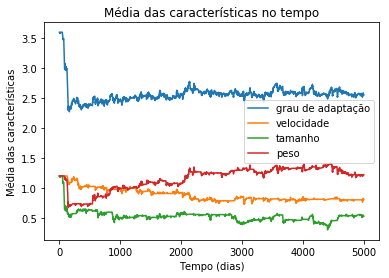

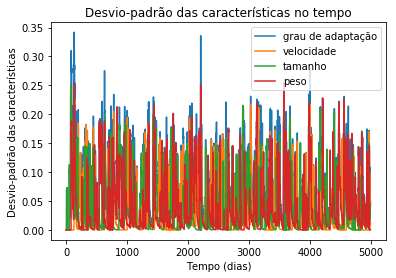

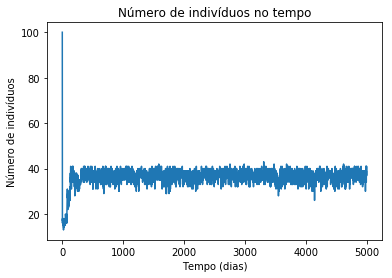

In [121]:
env5 = Environment3(n = 100, speed = 1.2, size = 1.2, weight = 1.2, energy = 100, mutation = 0.005, age = 10)
env5.run(days = 5000, nFood = 50)
env5.plot()

During 5000 days:

38362 individuals were born
38325 individuals died, 5642 of them by age
Mean of fitness: 2.6754007718638255
Mean of speed: 0.44438739378900843
Mean of size: 0.6513975438217411
Mean of weight: 1.5796158342530764


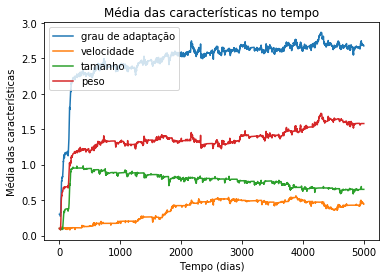

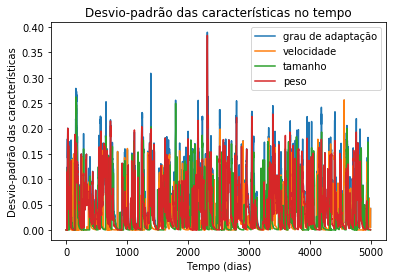

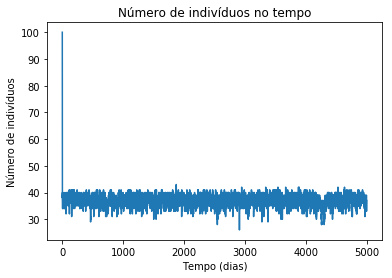

In [122]:
env6 = Environment3(n = 100, speed = 0.1, size = 0.1, weight = 0.1, energy = 100, mutation = 0.005, age = 10)
env6.run(days = 5000, nFood = 50)
env6.plot()